## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2021-12-13 16:26:48--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-12-13 16:26:48--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc025aaedc87c5e2335057af9874.dl.dropboxusercontent.com/cd/0/inline/BbzlS-MWsVSe9ITj9ZlH3NI3kYLk3b35Vfj0X-jy6NeVg0kNZ12BH3ImQIivfWFDy4IOeYpMpdwWfhYfgm7ztgtt2tytJhioz6-Rv2qiLXjD_yjyYjLVuBafAxtpejci61AkRe3Gx0iBLbM0P6AoMS9s/file# [following]
--2021-12-13 16:26:49--  https://uc025aaedc87c5e2335057af9874.dl.dropboxusercontent.com/cd/0/inline/BbzlS-MWsVSe9ITj9ZlH3NI3kYLk3b35Vfj0X-jy6NeVg0kNZ12BH3ImQIivfWFDy4IOeYpMpdwWfhYfgm7ztgtt2tytJhioz6-Rv2qiLXj

In [2]:
import pandas as pd
import numpy as np


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
df = pd.read_csv("/Users/gianmarco/data/data_000637.txt", nrows=15000)

2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,15000.0,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000
mean,1.0,0.302000,55.250333,3.869200e+09,1804.428533,13.396067
std,0.0,0.459141,39.093898,4.318600e+01,1062.270373,9.211141
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,1.0,0.000000,24.000000,3.869200e+09,839.000000,5.000000
50%,1.0,0.000000,56.000000,3.869200e+09,1815.000000,13.000000
75%,1.0,1.000000,64.000000,3.869200e+09,2756.000000,21.000000
max,1.0,1.000000,139.000000,3.869200e+09,3563.000000,29.000000


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
def tiempo(a,b,c):
    t_in = 3869200167*3564*25 + 2374*25 + 26*(25/30)
    t_passed = ((a*3564*25)+(b*25)+c*(25/30)) - t_in
    return t_passed


a1 = df.iloc[14999]["ORBIT_CNT"]
b1 = df.iloc[14999]["BX_COUNTER"]
c1 = df.iloc[14999]["TDC_MEAS"]

t1 = tiempo(a1,b1,c1)

t1

13305003.3125

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
df["absolute time (ns)"] = tiempo(df["ORBIT_CNT"],df["BX_COUNTER"],df["TDC_MEAS"])
df.head

<bound method NDFrame.head of        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
14995     1     1            4  3869200316        3399         9   
14996     1     1           17  3869200316        3400        15   
14997     1     1           10  3869200316        3530        16   
14998     1     1            8  3869200316        3533        18   
14999     1     0          139  3869200316        3539         0   

       absolute time (ns)  
0            0.000000e+00  
1            8.125000e-01  
2            4.476625e+03  
3            4.594125e+03  
4            

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
df['HEAD'] = np.random.randint(2, size=len(df['HEAD']))

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [8]:
dfn = df[(df['HEAD'] == 1)]

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

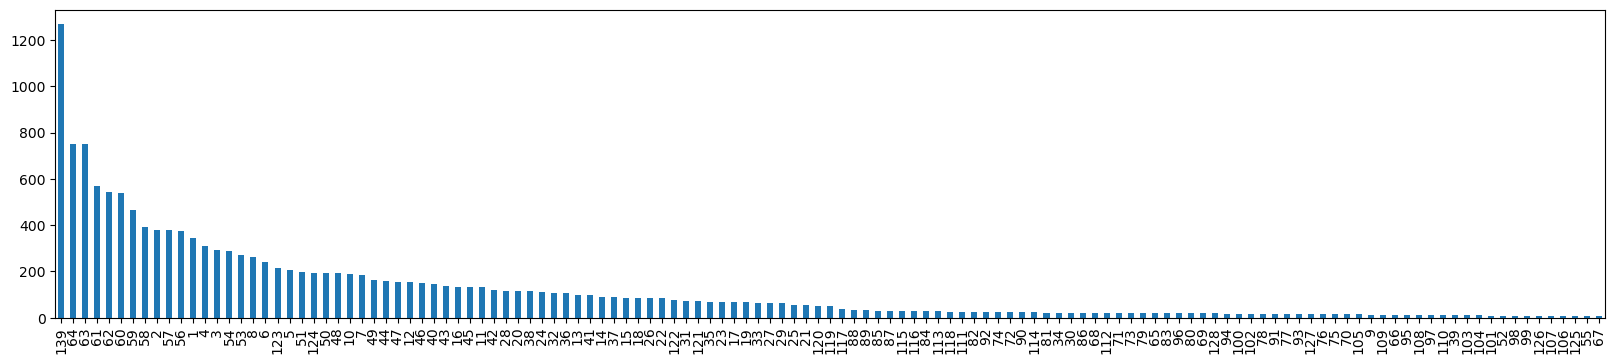

In [9]:
pd.value_counts(df['TDC_CHANNEL']).plot.bar(figsize=(20, 4)).figure


8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [10]:
pd.value_counts(df['TDC_CHANNEL']).head(5)

139    1268
64      752
63      749
61      571
62      542
Name: TDC_CHANNEL, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [14]:

print('Number of unique orbits in Channel 139: ',
      df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique())

print("Percentage of unique orbits: %", 100*150/1268)

Number of unique orbits in Channel 139:  150
Percentage of unique orbits: % 11.829652996845425
